## Exemplo adaptado do livro
Python Data Science Handbook de Jake VanderPlas - [Feature Engineering](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html)


## Engenharia de Features
Nesse exemplo, vamos fazer um passo a passo com algumas técnicas estudadas.

Obs.: Nesse material, não é premissa que o aluno entenda de Python. 

### Features Categóricas

In [0]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [0]:
# Lembra das aulas? Como podemos tratar a informação de "neighborhood".
## Uma forma é enumear.
neighborhood_enum = {'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3}

# Entretanto, a forma mais adequada nesse caso é aplicar one hot encoding, pois
## o atributo ordenação
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse=False, dtype=int)
vectorizer.fit_transform(data)

In [0]:
# Mas como descobrir a que se refere cada 1 e 0?
vectorizer.get_feature_names()

### Features Textuais

In [3]:
text_sample = ['nao nada nunca nada',
               'nao posso querer nada',
               'parte mim todos sonhos mundo']

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
processed_text = vectorizer.fit_transform(text_sample)

# Uma matriz esparsa é uma estrutura de dados multidimensional onde a maior
## parte dos valores é zero, ou nula
processed_text

<3x10 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [5]:
import pandas as pd
pd.DataFrame(processed_text.toarray(), columns=vectorizer.get_feature_names())

,mim,mundo,nada,nao,nunca,parte,posso,querer,sonhos,todos
0,0,0,2,1,1,0,0,0,0,0
1,0,0,1,1,0,0,1,1,0,0
2,1,1,0,0,0,1,0,0,1,1


## Dados omissos

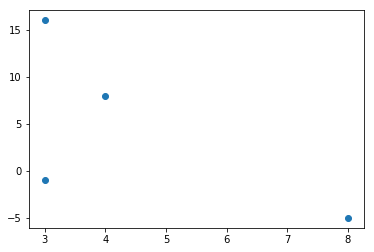

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[ np.nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   np.nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])
plt.scatter(X[:, 0], y)

In [7]:
# Essa classe permite aplicar regras simples da propagação de valores omissos 
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')

X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

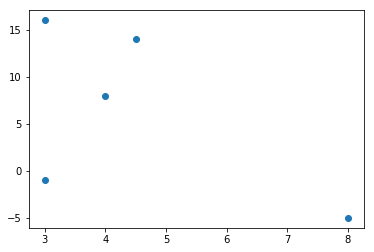

In [8]:
plt.scatter(X2[:, 0], y)